# Logistic Regression Implementation

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load & Check Data

In [2]:
#reading the data 

df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
# we have 918 rows 
# 11 Attributes (6 Numeric and 5 Categorical), and target column (HeartDisease)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df["HeartDisease"].value_counts() # 508 has heart disease and 410 do not

1    508
0    410
Name: HeartDisease, dtype: int64

In [5]:
df.describe() # doesn't include the categorical values

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
#no null/empty or duplicated value

#df.isna().sum()
#df.duplicated().sum()
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Data Pre-processing & Feature Engineering

The categorical features (i.e., Sex, ExerciseAngina, ChestPainType, RestingECG, STSlope) need to be converted into dummy/indicator or one-hot encoding variables.

### One-hot encoding

In [7]:
dummie_sex = pd.get_dummies(df.Sex)
dummie_EA = pd.get_dummies(df.ExerciseAngina)
dummie_CP = pd.get_dummies(df.ChestPainType)
dummie_RECG = pd.get_dummies(df.RestingECG)
dummie_STS = pd.get_dummies(df.ST_Slope)

#dummie_sex
#dummie_EA
#dummie_CP
#dummie_RECG
#dummie_STS

In [8]:
#Merging dummy variables
merged_df = pd.concat([df,dummie_sex,dummie_EA,dummie_CP,dummie_RECG,dummie_STS],axis=1)
pd.set_option('display.max_columns', None)
merged_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [9]:
#dropping the categorical columns
final_df = merged_df.drop(['Sex','ExerciseAngina','ChestPainType','RestingECG','ST_Slope'], axis=1)
pd.set_option('display.max_columns', None)
final_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


In [10]:
Y = final_df.HeartDisease.values # Y is now a numpy array
X = final_df.drop(['HeartDisease'],axis=1)

In [11]:
print("Shape of X (features) : ", X.shape) # 918 rows and 20 columns(features)
print("Shape of Y (label) : ", Y.shape)    # 918 rows and 1 column for the label

Shape of X (features) :  (918, 20)
Shape of Y (label) :  (918,)


In [12]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,F,M,N,Y,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1


## Train-Test Split (80%-20%)

In [13]:
# Train - Test : 80-20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8, random_state = 42) 

#random state is so that the test data doesn't change when ran multiple times


X_train = X_train.T
X_test = X_test.T

Y_train = Y_train.reshape(1, X_train.shape[1])
Y_test = Y_test.reshape(1, X_test.shape[1])

In [14]:
print("Shape of X_train : ", X_train.shape)  # (20 X 734)
print("Shape of Y_train : ", Y_train.shape)  # (1 X 734)
print("Shape of X_test : ", X_test.shape)    # (20 X 184)
print("Shape of Y_test : ", Y_test.shape)    # (1 X 184)

Shape of X_train :  (20, 734)
Shape of Y_train :  (1, 734)
Shape of X_test :  (20, 184)
Shape of Y_test :  (1, 184)


### Normalization of the Training Features 

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.


Normalization across instances should be done after splitting the data between training and test set, using only the data from the training set.

This is because the test set plays the role of fresh unseen data, so it's not supposed to be accessible at the training stage. Using any information coming from the test set before or during training is a potential bias in the evaluation of the performance.

In [15]:
X_train = (X_train - np.min(X_train)) / (np.max(X_train) - np.min(X_train)).values
X_train.head()

,795,25,84,10,344,254,398,244,621,118,300,326,29,55,430,390,911,916,196,404,81,464,689,568,281,803,204,554,658,296,858,547,368,783,829,731,882,59,323,862,380,259,490,302,7,892,155,362,869,101,199,416,359,311,580,707,757,891,396,2,529,518,351,275,158,528,854,575,342,766,855,456,533,615,367,370,486,665,669,212,79,148,500,710,631,394,594,133,813,734,360,875,712,477,409,448,838,306,172,874,327,487,825,90,859,181,893,863,69,291,131,904,494,135,164,28,514,193,321,585,169,602,140,173,6,589,388,73,626,823,879,145,234,220,836,405,132,539,606,185,41,559,108,797,56,643,361,578,24,365,447,453,51,424,841,581,264,711,625,845,847,18,656,800,526,83,61,272,285,830,482,12,182,596,850,223,536,682,408,420,534,558,176,687,462,433,163,248,582,809,74,113,521,512,104,114,411,92,516,89,336,906,842,853,828,545,880,94,11,449,43,42,329,167,801,549,692,100,178,595,806,605,177,638,620,728,715,383,257,457,335,693,15,3,428,256,703,495,440,393,222,179,485,617,324,542,9,249,22,356,221,613,788,901,743,340,431,808,530,203,237,93,506,756,633,284,184,737,434,501,153,75,450,673,587,277,68,446,576,188,271,678,567,236,88,777,117,125,750,289,238,0,908,736,798,395,543,126,278,708,116,473,228,635,670,57,527,274,318,618,144,649,570,834,657,369,268,636,307,423,310,354,46,349,371,479,588,261,195,917,764,790,263,443,730,304,341,885,149,124,721,50,353,848,142,470,399,754,320,19,753,770,741,407,537,569,38,175,245,760,909,755,785,154,287,552,17,127,322,255,604,883,190,115,680,180,301,695,653,664,628,659,517,902,45,867,157,735,171,16,511,48,889,895,515,629,480,283,601,225,26,717,437,870,364,229,37,884,374,469,886,778,666,194,781,810,503,888,761,579,887,162,644,152,900,765,697,111,226,630,103,421,419,586,119,53,151,403,865,207,786,739,8,740,36,452,253,303,704,571,623,651,660,262,610,297,414,150,723,640,812,550,819,488,147,146,897,851,677,348,463,325,186,123,780,608,143,877,197,609,279,293,400,122,183,202,438,246,415,817,811,129,637,402,814,706,835,219,641,837,688,915,624,767,696,386,890,509,267,751,441,496,112,691,232,796,607,671,373,899,833,233,720,676,317,648,410,832,709,358,258,627,632,282,376,384,224,872,746,472,347,505,639,905,849,827,619,873,645,774,556,876,577,85,242,698,159,524,35,540,170,654,784,843,864,733,95,563,240,742,574,690,460,553,802,206,392,397,852,217,4,642,820,612,738,546,725,683,98,727,573,406,502,47,32,779,200,134,27,804,230,489,772,378,288,418,674,391,592,498,138,62,471,647,128,894,520,64,14,156,40,492,379,187,763,216,791,52,337,748,719,724,295,701,251,726,461,455,914,815,269,201,161,555,729,401,702,476,821,771,105,565,389,1,857,561,80,205,34,775,508,427,454,366,91,339,564,345,776,241,13,315,600,387,273,166,840,910,646,818,484,898,504,831,243,566,562,686,189,782,699,475,681,510,58,474,560,856,747,252,21,313,459,160,276,191,385,805,413,491,343,769,308,661,130,663,871,99,372,87,458,330,214,466,121,614,20,700,71,106,270,860,435,102
Age,0.175000,0.172249,0.262911,0.175355,0.425000,0.221774,0.315152,0.179104,0.218750,0.189189,0.37500,0.326575,0.271277,0.262887,0.385135,0.364286,0.335227,0.241525,0.164983,0.391667,0.226891,0.450382,0.300448,0.131488,0.220721,0.157360,0.304348,0.302857,0.233503,0.344828,0.231343,0.305,0.407143,0.190678,0.142157,0.184739,0.190476,0.152047,0.484375,0.241636,0.37500,0.171875,0.336449,0.424,0.259615,0.177273,0.163743,0.36129,0.278302,0.284916,0.185065,0.242308,0.460870,0.480,0.335526,0.203008,0.214592,0.237410,0.433566,0.130742,0.341232,0.436364,0.307143,0.276995,0.151724,0.345070,0.160000,0.198582,0.539823,0.228311,0.248175,0.508333,0.250000,0.217391,0.503704,0.444444,0.257009,0.133333,0.192308,0.202899,0.237864,0.297619,0.262097,0.170909,0.147910,0.35625,0.226562,0.243478,0.288703,0.197880,0.3875,0.170588,0.247863,0.554545,0.33125,0.273913,0.190909,0.354839,0.165625,0.174089,0.472,0.266355,0.204861,0.235577,0.165584,0.227679,0.245690,0.324324,0.106796,0.182879,0.227723,0.233333,0.277778,0.184906,0.231111,0.113248,0.352459,0.234375,0.581438,0.200000,0.324022,0.181009,0.157100,0.262032,0.189873,0.312236,0.392857,0.201835,0.234513,0.2

In [16]:
X_train.shape

(20, 734)

In [17]:
X_train.describe()

,795,25,84,10,344,254,398,244,621,118,300,326,29,55,430,390,911,916,196,404,81,464,689,568,281,803,204,554,658,296,858,547,368,783,829,731,882,59,323,862,380,259,490,302,7,892,155,362,869,101,199,416,359,311,580,707,757,891,396,2,529,518,351,275,158,528,854,575,342,766,855,456,533,615,367,370,486,665,669,212,79,148,500,710,631,394,594,133,813,734,360,875,712,477,409,448,838,306,172,874,327,487,825,90,859,181,893,863,69,291,131,904,494,135,164,28,514,193,321,585,169,602,140,173,6,589,388,73,626,823,879,145,234,220,836,405,132,539,606,185,41,559,108,797,56,643,361,578,24,365,447,453,51,424,841,581,264,711,625,845,847,18,656,800,526,83,61,272,285,830,482,12,182,596,850,223,536,682,408,420,534,558,176,687,462,433,163,248,582,809,74,113,521,512,104,114,411,92,516,89,336,906,842,853,828,545,880,94,11,449,43,42,329,167,801,549,692,100,178,595,806,605,177,638,620,728,715,383,257,457,335,693,15,3,428,256,703,495,440,393,222,179,485,617,324,542,9,249,22,356,221,613,788,901,743,340,431,808,530,203,237,93,506,756,633,284,184,737,434,501,153,75,450,673,587,277,68,446,576,188,271,678,567,236,88,777,117,125,750,289,238,0,908,736,798,395,543,126,278,708,116,473,228,635,670,57,527,274,318,618,144,649,570,834,657,369,268,636,307,423,310,354,46,349,371,479,588,261,195,917,764,790,263,443,730,304,341,885,149,124,721,50,353,848,142,470,399,754,320,19,753,770,741,407,537,569,38,175,245,760,909,755,785,154,287,552,17,127,322,255,604,883,190,115,680,180,301,695,653,664,628,659,517,902,45,867,157,735,171,16,511,48,889,895,515,629,480,283,601,225,26,717,437,870,364,229,37,884,374,469,886,778,666,194,781,810,503,888,761,579,887,162,644,152,900,765,697,111,226,630,103,421,419,586,119,53,151,403,865,207,786,739,8,740,36,452,253,303,704,571,623,651,660,262,610,297,414,150,723,640,812,550,819,488,147,146,897,851,677,348,463,325,186,123,780,608,143,877,197,609,279,293,400,122,183,202,438,246,415,817,811,129,637,402,814,706,835,219,641,837,688,915,624,767,696,386,890,509,267,751,441,496,112,691,232,796,607,671,373,899,833,233,720,676,317,648,410,832,709,358,258,627,632,282,376,384,224,872,746,472,347,505,639,905,849,827,619,873,645,774,556,876,577,85,242,698,159,524,35,540,170,654,784,843,864,733,95,563,240,742,574,690,460,553,802,206,392,397,852,217,4,642,820,612,738,546,725,683,98,727,573,406,502,47,32,779,200,134,27,804,230,489,772,378,288,418,674,391,592,498,138,62,471,647,128,894,520,64,14,156,40,492,379,187,763,216,791,52,337,748,719,724,295,701,251,726,461,455,914,815,269,201,161,555,729,401,702,476,821,771,105,565,389,1,857,561,80,205,34,775,508,427,454,366,91,339,564,345,776,241,13,315,600,387,273,166,840,910,646,818,484,898,504,831,243,566,562,686,189,782,699,475,681,510,58,474,560,856,747,252,21,313,459,160,276,191,385,805,413,491,343,769,308,661,130,663,871,99,372,87,458,330,214,466,121,614,20,700,71,106,270,860,435,102
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.

## Logistic Regression Model

In [18]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [19]:
def initialize_weight_bias(n):
    W = np.zeros((n,1))  # make a column vector of (nX1) with zeros
    B = 0                # B is initialized to zero
    return W, B

In [20]:
def forward_backward_propagation(W, B, X, Y):           # X and Y are the training datasets
    
    m = X.shape[1]
    
    #forward propagation
    Z = np.dot(W.T, X) + B  #linear transformation
    A = sigmoid(Z)          #sigmoid activation function
    
    # cost function is to measure the error w.r.t the training label Y
    cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A)) 
    
    # Gradient Descent | Backward Propagation use the proof in the report
    # To minimize the cost function by finding the local minima
    dW = (1/m)*np.dot(A - Y, X.T)
    dB = (1/m)*np.sum(A - Y)
    
    gradients = {"Derivative_Weight": dW, "Derivative_Bias": dB}
    
    return cost, gradients

updating the new weights and bias
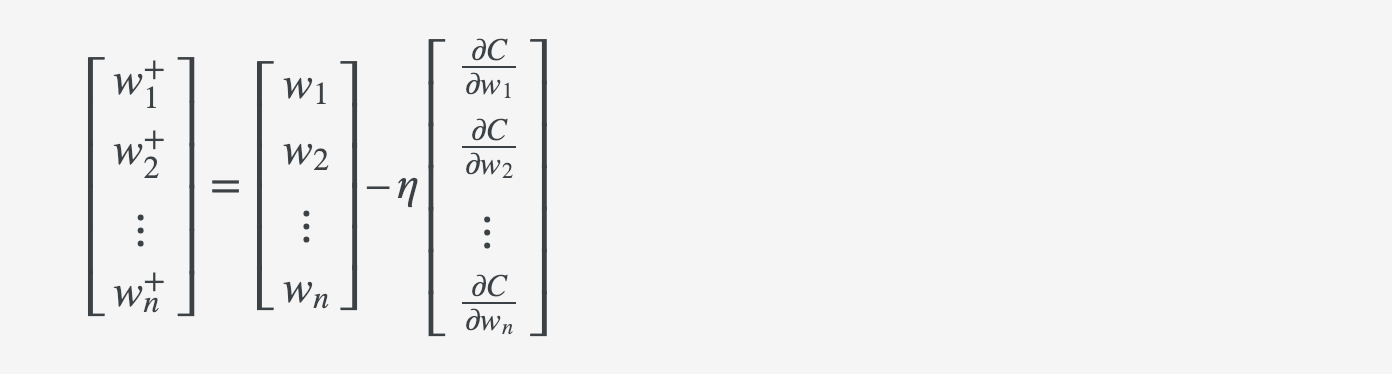

In [21]:
# The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point
# If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.


def update_learning_params(W, B, X, Y, learning_rate, number_of_iteration):
    
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iteration):
        
        #make forward and backward prop to find the cost and gradients
        cost, gradients = forward_backward_propagation (W, B, X, Y)   # X and Y are the training datasets
        cost_list.append(cost)
        
        #For gradient descent, we move in the opposite direction of the gradients. 
        #We will be updating the weights in every iteration until the convergence.
        W = W - learning_rate * gradients["Derivative_Weight"].T #keys
        B = B - learning_rate * gradients["Derivative_Bias"]
        
        if (i%(number_of_iteration/10) == 0):
            cost_list2.append(cost)
            index. append(i)
            print("cost after ", i, "iteration is : ", cost)
            
    
    parameters = {"Weight": W, "Bias": B}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

(20, 1)
________________
0
cost after  0 iteration is :  0.6931471805599453
cost after  20000 iteration is :  0.5889578398842893
cost after  40000 iteration is :  0.5700182317066066
cost after  60000 iteration is :  0.5623955215612986
cost after  80000 iteration is :  0.5587895108857851
cost after  100000 iteration is :  0.5568159464762517
cost after  120000 iteration is :  0.5555725680675633
cost after  140000 iteration is :  0.554682525280376
cost after  160000 iteration is :  0.5539770177767076
cost after  180000 iteration is :  0.5533761493743231


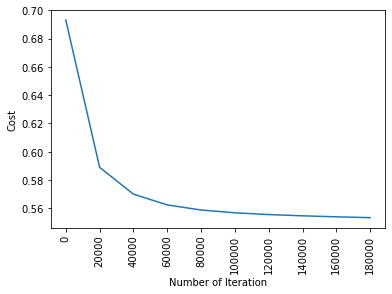

In [22]:
#checking if the cost function is decreasing with each iteration
n = X_train.shape[0] # number of features/attributes in one dataset

W, B = initialize_weight_bias(20)
print(W.shape)
print("________________")
print(B)

parameters, gradients, cost_list = update_learning_params(W, B, X_train, Y_train, learning_rate = 0.01, number_of_iteration = 200000)

In [23]:
# training the model is over ^
# now predicting the testing dataset 

In [24]:
def predict (W, B, X): # the X here is the testing dataset
    
    #forward propagation on the testing dataset
    Z = sigmoid(np.dot(W.T, X) + B)          #sigmoid activation function
    Y_predicted = np.zeros((1, X.shape[1]))  # y is an array of zero of shape of the testing dataset
    
    for i in range (Z.shape[1]):
        if Z[0,i] <= 0.5:
            Y_predicted[0,i] = 0
        else:
            Y_predicted[0,i] = 1
    return Y_predicted

In [25]:
def logistic_model(trainX, trainY, testX, testY, learning_rate, iterations):
    
    m = trainX.shape[1] # number of samples dataset
    n = trainX.shape[0] # number of features/attributes in one dataset
    W, B = initialize_weight_bias(n)
    
    parameters, gradients, cost_list = update_learning_params(W, B, trainX, trainY, learning_rate, iterations)
    
    y_prediction_test = predict(parameters["Weight"], parameters["Bias"], testX)
    
    print ("Test Accuracy: {} %". format(100 - np.mean(np.abs(y_prediction_test - testY)) * 100))
    return y_prediction_test

### Normalization of the Testing Features  

Normalizing the testing dataset after building the model

In [26]:
X_test = (X_test - np.min(X_test)) / (np.max(X_test) - np.min(X_test)).values
X_test.head()

,668,30,377,535,807,793,363,583,165,483,773,551,768,694,718,312,713,309,846,616,355,39,231,822,603,63,192,481,866,67,72,655,679,139,732,824,174,896,499,70,716,23,541,799,672,826,250,752,350,758,759,107,445,141,650,544,110,593,519,907,675,280,136,422,208,442,86,44,531,913,634,290,338,357,292,227,591,425,789,522,861,352,493,60,598,722,426,468,66,332,375,381,557,260,235,218,382,439,762,305,137,538,76,794,436,266,215,334,523,507,209,444,749,662,198,839,299,597,685,844,497,316,294,622,903,96,467,120,465,548,78,239,210,652,412,590,513,792,65,319,286,611,328,744,429,314,49,667,168,816,881,912,572,714,33,31,684,417,525,247,109,77,346,213,82,298,331,432,868,705,532,599,5,54,265,478,333,787,97,211,745,584,878,451
Age,0.323077,0.102317,0.40625,0.430769,0.174757,0.263780,0.378378,0.254613,0.169118,0.483333,0.290155,0.281818,0.211221,0.237288,0.197232,0.232955,0.204473,0.313187,0.178082,0.118794,0.462069,0.211454,0.142349,0.241667,0.23871,0.166065,0.195918,0.492857,0.200913,0.142222,0.285714,0.179372,0.270386,0.174089,0.194444,0.148,0.195489,0.185771,0.208754,0.215094,0.282700,0.152778,0.633333,0.215447,0.337079,0.208163,0.089613,0.224900,0.441667,0.239437,0.190813,0.158879,0.241228,0.146628,0.187500,0.204698,0.313830,0.248062,0.206557,0.260355,0.329480,0.243902,0.200000,0.275424,0.151351,0.398438,0.247148,0.245714,0.209150,0.170455,0.201005,0.227488,0.422819,0.441667,0.291209,0.283582,0.272300,0.224719,0.186813,0.143266,0.262097,0.471074,0.150442,0.193676,0.243363,0.232558,0.337349,0.405229,0.151515,0.217102,0.45625,0.416667,0.269231,0.167273,0.195,0.280612,0.296552,0.536232,0.239521,0.401575,0.161826,0.267327,0.060491,0.255102,0.467742,0.174497,0.126582,0.302871,0.36875,0.166667,0.250000,0.466667,0.232759,0.223350,0.215447,0.191257,0.315436,0.297297,0.234615,0.273684,0.253112,0.385135,0.251969,0.246862,0.253394,0.207729,0.477273,0.189516,0.175000,0.252874,0.371429,0.248705,0.182510,0.216117,0.448,0.381818,0.240310,0.199134,0.142308,0.468966,0.349112,0.446043,0.547368,0.260870,0.473684,0.375887,0.141869,0.155875,0.261261,0.193333,0.167300,0.236515,0.331606,0.204918,0.238372,0.335329,0.193416,0.210526,0.190678,0.174545,0.161826,0.209581,0.491667,0.255708,0.282511,0.463636,0.491379,0.355932,0.291429,0.266968,0.295699,0.275862,0.115044,0.288889,0.177049,0.183280,0.277778,0.224080,0.24375,0.173611,0.234201,0.262295,0.184211,0.444444
RestingBP,0.717949,0.279923,1.00000,1.000000,0.349515,0.492126,0.810811,0.523985,0.514706,1.000000,0.621762,0.545455,0.429043,0.508475,0.570934,0.710227,0.447284,0.521978,0.538813,0.203901,1.000000,0.660793,0.462633,0.437500,0.50000,0.433213,0.530612,1.000000,0.593607,0.488889,0.659341,0.681614,0.622318,0.607287,0.694444,0.520,0.526316,0.513834,0.454545,0.528302,0.506329,0.520833,0.866667,0.528455,0.674157,0.510204,0.274949,0.502008,1.000000,0.586854,0.678445,0.700935,0.596491,0.410557,0.507812,0.469799,0.691489,0.503876,0.314754,0.710059,0.867052,0.487805,0.558140,0.635593,0.702703,1.000000,0.646388,0.685714,0.467320,0.416667,0.703518,0.521327,0.939597,1.000000,0.714286,0.686567,0.469484,0.599251,0.648352,0.412607,0.443548,1.000000,0.404130,0.395257,0.530973,0.581395,0.759036,0.993464,0.444444,0.561355,1.00000,0.958333,0.658654,0.509091,0.600,0.714286,0.793103,1.000000,0.658683,0.944882,0.497925,0.643564,0.223062,0.658163,0.935484,0.436242,0.717300,0.765671,0.77500,0.441667,0.578704,1.000000,0.646552,0.558376,0.487805,0.754098,0.738255,0.718919,0.461538,0.621053,0.605809,0.709459,0.748031,0.460251,0.588235,0.685990,1.000000,0.544355,0.558333,0.429119,1.000000,0.829016,0.403042,0.586081,1.000,0.824242,0.434109,0.649351,0.461538,1.000000,0.828402,0.971223,1.000000,0.508696,1.000000,0.567376,0.380623,0.335731,0.608108,0.416667,0.456274,0.580913,0.777202,0.491803,0.755814,0.778443,0.444444,0.622010,0.550847,0.443636,0.788382,0.838323,1.000000,0.593607,0.672646,1.000000,1.000000,0.960452,0.628571,0.633484,0.623656,0.640394,0.353982,0.722222,0.524590,0.418006,0.659722,0.334448,1.00000,0.486111,0.401487,0.577869,0.48872

In [28]:
X_test.shape

(20, 184)

In [29]:
X_train.head()

,795,25,84,10,344,254,398,244,621,118,300,326,29,55,430,390,911,916,196,404,81,464,689,568,281,803,204,554,658,296,858,547,368,783,829,731,882,59,323,862,380,259,490,302,7,892,155,362,869,101,199,416,359,311,580,707,757,891,396,2,529,518,351,275,158,528,854,575,342,766,855,456,533,615,367,370,486,665,669,212,79,148,500,710,631,394,594,133,813,734,360,875,712,477,409,448,838,306,172,874,327,487,825,90,859,181,893,863,69,291,131,904,494,135,164,28,514,193,321,585,169,602,140,173,6,589,388,73,626,823,879,145,234,220,836,405,132,539,606,185,41,559,108,797,56,643,361,578,24,365,447,453,51,424,841,581,264,711,625,845,847,18,656,800,526,83,61,272,285,830,482,12,182,596,850,223,536,682,408,420,534,558,176,687,462,433,163,248,582,809,74,113,521,512,104,114,411,92,516,89,336,906,842,853,828,545,880,94,11,449,43,42,329,167,801,549,692,100,178,595,806,605,177,638,620,728,715,383,257,457,335,693,15,3,428,256,703,495,440,393,222,179,485,617,324,542,9,249,22,356,221,613,788,901,743,340,431,808,530,203,237,93,506,756,633,284,184,737,434,501,153,75,450,673,587,277,68,446,576,188,271,678,567,236,88,777,117,125,750,289,238,0,908,736,798,395,543,126,278,708,116,473,228,635,670,57,527,274,318,618,144,649,570,834,657,369,268,636,307,423,310,354,46,349,371,479,588,261,195,917,764,790,263,443,730,304,341,885,149,124,721,50,353,848,142,470,399,754,320,19,753,770,741,407,537,569,38,175,245,760,909,755,785,154,287,552,17,127,322,255,604,883,190,115,680,180,301,695,653,664,628,659,517,902,45,867,157,735,171,16,511,48,889,895,515,629,480,283,601,225,26,717,437,870,364,229,37,884,374,469,886,778,666,194,781,810,503,888,761,579,887,162,644,152,900,765,697,111,226,630,103,421,419,586,119,53,151,403,865,207,786,739,8,740,36,452,253,303,704,571,623,651,660,262,610,297,414,150,723,640,812,550,819,488,147,146,897,851,677,348,463,325,186,123,780,608,143,877,197,609,279,293,400,122,183,202,438,246,415,817,811,129,637,402,814,706,835,219,641,837,688,915,624,767,696,386,890,509,267,751,441,496,112,691,232,796,607,671,373,899,833,233,720,676,317,648,410,832,709,358,258,627,632,282,376,384,224,872,746,472,347,505,639,905,849,827,619,873,645,774,556,876,577,85,242,698,159,524,35,540,170,654,784,843,864,733,95,563,240,742,574,690,460,553,802,206,392,397,852,217,4,642,820,612,738,546,725,683,98,727,573,406,502,47,32,779,200,134,27,804,230,489,772,378,288,418,674,391,592,498,138,62,471,647,128,894,520,64,14,156,40,492,379,187,763,216,791,52,337,748,719,724,295,701,251,726,461,455,914,815,269,201,161,555,729,401,702,476,821,771,105,565,389,1,857,561,80,205,34,775,508,427,454,366,91,339,564,345,776,241,13,315,600,387,273,166,840,910,646,818,484,898,504,831,243,566,562,686,189,782,699,475,681,510,58,474,560,856,747,252,21,313,459,160,276,191,385,805,413,491,343,769,308,661,130,663,871,99,372,87,458,330,214,466,121,614,20,700,71,106,270,860,435,102
Age,0.175000,0.172249,0.262911,0.175355,0.425000,0.221774,0.315152,0.179104,0.218750,0.189189,0.37500,0.326575,0.271277,0.262887,0.385135,0.364286,0.335227,0.241525,0.164983,0.391667,0.226891,0.450382,0.300448,0.131488,0.220721,0.157360,0.304348,0.302857,0.233503,0.344828,0.231343,0.305,0.407143,0.190678,0.142157,0.184739,0.190476,0.152047,0.484375,0.241636,0.37500,0.171875,0.336449,0.424,0.259615,0.177273,0.163743,0.36129,0.278302,0.284916,0.185065,0.242308,0.460870,0.480,0.335526,0.203008,0.214592,0.237410,0.433566,0.130742,0.341232,0.436364,0.307143,0.276995,0.151724,0.345070,0.160000,0.198582,0.539823,0.228311,0.248175,0.508333,0.250000,0.217391,0.503704,0.444444,0.257009,0.133333,0.192308,0.202899,0.237864,0.297619,0.262097,0.170909,0.147910,0.35625,0.226562,0.243478,0.288703,0.197880,0.3875,0.170588,0.247863,0.554545,0.33125,0.273913,0.190909,0.354839,0.165625,0.174089,0.472,0.266355,0.204861,0.235577,0.165584,0.227679,0.245690,0.324324,0.106796,0.182879,0.227723,0.233333,0.277778,0.184906,0.231111,0.113248,0.352459,0.234375,0.581438,0.200000,0.324022,0.181009,0.157100,0.262032,0.189873,0.312236,0.392857,0.201835,0.234513,0.2

cost after  0 iteration is :  0.6931471805599453
cost after  1000000 iteration is :  0.4539478696630616
cost after  2000000 iteration is :  0.4076742130056237
cost after  3000000 iteration is :  0.3827957912450941
cost after  4000000 iteration is :  0.36766217495028675
cost after  5000000 iteration is :  0.3576019936939704
cost after  6000000 iteration is :  0.3504733788501409
cost after  7000000 iteration is :  0.34517978265780314
cost after  8000000 iteration is :  0.34110832295793997
cost after  9000000 iteration is :  0.33789141956514623


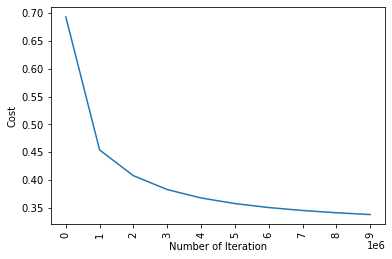

Test Accuracy: 84.78260869565217 %


In [46]:
Y_pred = logistic_model(X_train, Y_train, X_test, Y_test, learning_rate = 0.1, iterations = 10000000)

In [35]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (20, 734)
Y_train shape:  (1, 734)
X_test shape:  (20, 184)
Y_test shape:  (1, 184)


In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train.T,Y_train.T)
print("Test Accuracy {}".format(lr.score(X_test.T,Y_test.T)))

Test Accuracy 0.6902173913043478


Comapring the custom Logistic regression Model with the sklearn LogisticRegression Library

Result:

Custom Logistic Regression Model: 87.5%
Sklearn Library                 : 69%

## Confusion Matrics

In [ ]:
Y_test = Y_test.T   # one column vector
Y_pred = Y_pred.T   # one column vector

In [ ]:
Y_test[4][0]

In [ ]:
Y_test

In [ ]:
Y_pred[5][0]

In [ ]:
def confusion_matrix(pred,original): #pass predicted and original labels to this function

    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    matrix=np.zeros((2,2))
    
    for i in range(len(pred)): #the confusion matrix is for 2 classes: 1,0
        
        
        if int(pred[i][0])== 1 and (original[i][0])==1: 
            TP += 1 #True Positives
        elif int(pred[i][0])== 1 and (original[i][0])== 0:
            FP += 1 #False Positives
        elif int(pred[i][0])== 0 and (original[i][0])==1:
            FN += 1 #False Negatives
        elif int(pred[i][0])==0 and (original[i][0])==0:
            TN += 1 #True Negatives
    
    precision = TP / (TP + FP)
    print("Precision:",precision)
    recall = TP / (TP + FN)
    print("Recall:",recall)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    print("Accuracy:",accuracy)
    f1= 2*(precision*recall)/(precision+recall) 
    print("F1 score:",f1)

    matrix[0][0] = TP
    matrix[0][1] = FP
    matrix[1][0] = FN
    matrix[1][1] = TN
    
    return matrix
    

In [ ]:
confusion_matrix(Y_pred,Y_test)

## Cross Validation 

In [ ]:
#splitting the data into 5 folds

def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [ ]:
list(split(X,5))[4]

In [ ]:
df_cv = final_df.reindex(np.random.permutation(df.index))                                                          
print("Randomized data by randomizing the index : ")

df_cv

In [ ]:
df_cv = df_cv.reset_index(drop=True)                                                                                   
print("Randomized data with reseted index: ")

df_cv

In [ ]:
#five folds                                                              
fold1 = df_cv.loc[0:183]                                            
fold2 = df_cv.loc[184:367]
fold3 = df_cv.loc[368:551]
fold4 = df_cv.loc[552:734]
fold5 = df_cv.loc[735:917]

In [ ]:
#creating five different train-test split 

train_val1 = pd.concat([fold1, fold2, fold3, fold4])
test_val1 = fold5

train_val2 = pd.concat([fold1, fold2, fold3, fold5])
test_val2 = fold4

train_val3 = pd.concat([fold1, fold2, fold4, fold5])
test_val3 = fold3

train_val4 = pd.concat([fold1, fold3, fold4, fold5])
test_val4 = fold2

train_val5 = pd.concat([fold2, fold3, fold4, fold5])
test_val5 = fold1

In [ ]:
# seperating the X and Y in each fold

train_val1_Y = train_val1.HeartDisease.values
train_val1_X = train_val1.drop(['HeartDisease'],axis=1)
test_val1_Y = test_val1.HeartDisease.values
test_val1_X = test_val1.drop(['HeartDisease'],axis=1)

train_val2_Y = train_val2.HeartDisease.values
train_val2_X = train_val2.drop(['HeartDisease'],axis=1)
test_val2_Y = test_val2.HeartDisease.values
test_val2_X = test_val2.drop(['HeartDisease'],axis=1)

train_val3_Y = train_val3.HeartDisease.values
train_val3_X = train_val3.drop(['HeartDisease'],axis=1)
test_val3_Y = test_val3.HeartDisease.values
test_val3_X = test_val3.drop(['HeartDisease'],axis=1)

train_val4_Y = train_val4.HeartDisease.values
train_val4_X = train_val4.drop(['HeartDisease'],axis=1)
test_val4_Y = test_val4.HeartDisease.values
test_val4_X = test_val4.drop(['HeartDisease'],axis=1)

train_val5_Y = train_val5.HeartDisease.values
train_val5_X = train_val5.drop(['HeartDisease'],axis=1)
test_val5_Y = test_val5.HeartDisease.values
test_val5_X = test_val5.drop(['HeartDisease'],axis=1)


In [ ]:
#Normalizing the training datasets for each fold

train_val1_X = (train_val1_X - np.min(train_val1_X)) / (np.max(train_val1_X) - np.min(train_val1_X)).values
train_val2_X = (train_val2_X - np.min(train_val2_X)) / (np.max(train_val2_X) - np.min(train_val2_X)).values
train_val3_X = (train_val3_X - np.min(train_val3_X)) / (np.max(train_val3_X) - np.min(train_val3_X)).values
train_val4_X = (train_val4_X - np.min(train_val4_X)) / (np.max(train_val4_X) - np.min(train_val4_X)).values
train_val5_X = (train_val5_X - np.min(train_val5_X)) / (np.max(train_val5_X) - np.min(train_val5_X)).values

In [ ]:
#Normalizing the testing datasets for each fold

test_val1_X = (test_val1_X - np.min(test_val1_X)) / (np.max(test_val1_X) - np.min(test_val1_X)).values
test_val2_X = (test_val2_X - np.min(test_val2_X)) / (np.max(test_val2_X) - np.min(test_val2_X)).values
test_val3_X = (test_val3_X - np.min(test_val3_X)) / (np.max(test_val3_X) - np.min(test_val3_X)).values
test_val4_X = (test_val4_X - np.min(test_val4_X)) / (np.max(test_val4_X) - np.min(test_val4_X)).values
test_val5_X = (test_val5_X - np.min(test_val5_X)) / (np.max(test_val5_X) - np.min(test_val5_X)).values

In [ ]:
train_val1_X = train_val1_X.T
train_val1_Y = train_val1_Y.T
test_val1_X = test_val1_X.T
test_val1_Y = test_val1_Y.T

In [ ]:
print("Shape of train_val1_X : ", train_val1_X.shape) #(20, 735)
print("Shape of train_val1_Y : ", train_val1_Y.shape) #(735,)
print("Shape of test_val1_X : ", test_val1_X.shape)   #(20, 735)
print("Shape of test_val1_Y : ", test_val1_Y.shape)   #(183,)

In [ ]:
train_val2_X = train_val2_X.T
train_val2_Y = train_val2_Y.T
test_val2_X = test_val2_X.T
test_val2_Y = test_val2_Y.T

In [ ]:
print("Shape of train_val2_X : ", train_val2_X.shape)
print("Shape of train_val2_Y : ", train_val2_Y.shape)
print("Shape of test_val2_X : ", test_val2_X.shape)
print("Shape of test_val2_Y : ", test_val2_Y.shape)

In [ ]:
train_val3_X = train_val3_X.T
train_val3_Y = train_val3_Y.T
test_val3_X = test_val3_X.T
test_val3_Y = test_val3_Y.T

In [ ]:
print("Shape of train_val3_X : ", train_val3_X.shape)
print("Shape of train_val3_Y : ", train_val3_Y.shape)
print("Shape of test_val3_X : ", test_val3_X.shape)
print("Shape of test_val3_Y : ", test_val3_Y.shape)

In [ ]:
train_val4_X = train_val4_X.T
train_val4_Y = train_val4_Y.T
test_val4_X = test_val4_X.T
test_val4_Y = test_val4_Y.T

In [ ]:
print("Shape of train_val4_X : ", train_val4_X.shape)
print("Shape of train_val4_Y : ", train_val4_Y.shape)
print("Shape of test_val4_X : ", test_val4_X.shape)
print("Shape of test_val4_Y : ", test_val4_Y.shape)

In [ ]:
train_val5_X = train_val5_X.T
train_val5_Y = train_val5_Y.T
test_val5_X = test_val5_X.T
test_val5_Y = test_val5_Y.T

In [ ]:
print("Shape of train_val5_X : ", train_val5_X.shape)
print("Shape of train_val5_Y : ", train_val5_Y.shape)
print("Shape of test_val5_X : ", test_val5_X.shape)
print("Shape of test_val5_Y : ", test_val5_Y.shape)

### Best Learning rate

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1]
Y_pred_cv1 = {}

for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv1[i] = logistic_model(train_val1_X, train_val1_Y, test_val1_X, test_val1_Y, learning_rate = i, iterations = 100000)
    print("-------------------------------------------------------------------------------------")

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1]
Y_pred_cv2 = {}
for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv2[i] = logistic_model(train_val2_X, train_val2_Y, test_val2_X, test_val2_Y, learning_rate = i, iterations = 100000)
    print("-------------------------------------------------------------------------------------")

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1]
Y_pred_cv3 = {}
for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv3[i] = logistic_model(train_val3_X, train_val3_Y, test_val3_X, test_val3_Y, learning_rate = i, iterations = 100000)
    print("-------------------------------------------------------------------------------------")

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1]
Y_pred_cv4 = {}
for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv4[i] = logistic_model(train_val4_X, train_val4_Y, test_val4_X, test_val4_Y, learning_rate = i, iterations = 100000)
    print("-------------------------------------------------------------------------------------")

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1]
Y_pred_cv5 = {}
for i in learning_rates:
    print ("learning rate is: ",i)
    Y_pred_cv5[i] = logistic_model(train_val5_X, train_val5_Y, test_val5_X, test_val5_Y, learning_rate = i, iterations = 100000)
    print("-------------------------------------------------------------------------------------")

The best learning rate is 0.001 from the above comparison

### Best Iteration Number 

In [ ]:
iteration_number = [100000, 300000, 500000]
Y_pred_cv_1 = {}
for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_1[i] = logistic_model(train_val1_X, train_val1_Y, test_val1_X, test_val1_Y, learning_rate = 0.001, iterations = i)
    print("-------------------------------------------------------------------------------------")

In [ ]:
iteration_number = [100000, 300000, 500000]
Y_pred_cv_2 = {}
for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_2[i] = logistic_model(train_val2_X, train_val2_Y, test_val2_X, test_val2_Y, learning_rate = 0.001, iterations = i)
    print("-------------------------------------------------------------------------------------")

In [ ]:
iteration_number = [100000, 300000, 500000]
Y_pred_cv_3 = {}
for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_3[i] = logistic_model(train_val3_X, train_val3_Y, test_val3_X, test_val3_Y, learning_rate = 0.001, iterations = i)
    print("-------------------------------------------------------------------------------------")

In [ ]:
iteration_number = [100000, 300000, 500000]
Y_pred_cv_4 = {}
for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_4[i] = logistic_model(train_val4_X, train_val4_Y, test_val4_X, test_val4_Y, learning_rate = 0.001, iterations = i)
    print("-------------------------------------------------------------------------------------")

In [ ]:
iteration_number = [100000, 300000, 500000]
Y_pred_cv_5 = {}
for i in iteration_number:
    print ("iteration_number is: ",i)
    Y_pred_cv_5[i] = logistic_model(train_val5_X, train_val5_Y, test_val5_X, test_val5_Y, learning_rate = 0.001, iterations = i)
    print("-------------------------------------------------------------------------------------")

# 07. Conclusion